In [171]:
import numpy as np
import pandas as dp
import matplotlib.pyplot as plt
from matplotlib import ticker
import seaborn as sns
import os,random
import cv2
import csv

from sklearn.model_selection import train_test_split
from keras.models import Model
from keras.models import Sequential
from keras.layers import Input, Dropout, Flatten, Convolution2D, MaxPooling2D, Dense, Activation, Conv2D
from keras.optimizers import RMSprop,SGD,Adagrad
from keras.callbacks import ModelCheckpoint, Callback, EarlyStopping
from keras.utils import np_utils

In [152]:
#load image data from file and labels
#load labels
# define 8 kind of emotion,defined as one hot label
# anger-1    contempt-2    disgust-3   fear-4   happiness-5   neutral-6     sadness-7    surprise-8
def labelconvert():
    csv_file=csv.reader(open('train.csv','r'))
    x=list(csv_file)
    length=len(x)
    onehot_labels=np.zeros((length,8))
    labels=np.zeros((length))
    for i in range (0,len(x)):
        if (x[i][1]=='anger'):
            onehot_labels[i][0]=1
            labels[i]=0
        elif (x[i][1]=='contempt'):
            onehot_labels[i][1]=1
            labels[i]=1
        elif (x[i][1]=='disgust'):
            onehot_labels[i][2]=1
            labels[i]=2
        elif (x[i][1]=='fear'):
            onehot_labels[i][3]=1
            labels[i]=3
        elif (x[i][1]=='happiness'):
            onehot_labels[i][4]=1
            labels[i]=4
        elif (x[i][1]=='neutral'):
            onehot_labels[i][5]=1
            labels[i]=5
        elif (x[i][1]=='sadness'):
            onehot_labels[i][6]=1
            labels[i]=6
        elif (x[i][1]=='surprise'):
            onehot_labels[i][7]=1
            labels[i]=7
        else:
            labels[i]=0
    return onehot_labels,labels

#load images data
DATA_DIR='C:\\Users\\zhang\\Desktop\\EE599 coding\\HW4\\train_image\\'

ROWS = 224
COLS = 224
CHANNELS = 1

all_images = [DATA_DIR+i for i in os.listdir(DATA_DIR)] # use this for full dataset
#test_images =  [DATA_DIR+i for i in os.listdir(DATA_DIR) if i>=10000]


def read_image(file_path):
    img = cv2.imread(file_path,cv2.IMREAD_GRAYSCALE) #cv2.IMREAD_GRAYSCALE
    return cv2.resize(img, (ROWS, COLS), interpolation=cv2.INTER_CUBIC)

def prep_data(images):
    count = len(images)
    data = np.ndarray((count,  ROWS, COLS), dtype=np.uint8)

    for i, image_file in enumerate(images):
        image = read_image(image_file)
        data[i] = image
        if i%2000 == 0: print('Processed {} of {}'.format(i, count))
    
    return data

# get all data and labels, image data in 'data' array ,onehot labels in 'labels', number labels in 'num_labels'

data= prep_data(all_images)
labels,num_labels=labelconvert()

print("Data shape: {}".format(data.shape))

Processed 0 of 12993
Processed 2000 of 12993
Processed 4000 of 12993
Processed 6000 of 12993
Processed 8000 of 12993
Processed 10000 of 12993
Processed 12000 of 12993
Data shape: (12993, 224, 224)


In [153]:
# brief understanding of data
average_fig=data.sum(axis=0)/data.shape[0]
#plt.imshow(average_fig,cmap='gray')
#plt.title('average face')
#plt.show()
labels.sum(axis=0)

array([ 239.,    8.,  197.,   19., 5408., 6520.,  253.,  349.])

In [158]:
# data prepocessing
#include train/validaiton data seperation, balance data and augment data

# train/validation seperate
n_train=8000
n_validation=1000

train, val, train_labels, val_labels = train_test_split(data, labels, train_size=n_train,test_size=n_validation)
print("Train shape: {}".format(train.shape))
print('train labels distribution',train_labels.sum(axis=0))
print("Validation shape: {}".format(val.shape))
print('test labels distribution',val_labels.sum(axis=0))
# data augmentation



train_data=train.reshape(n_train,224,224,1)
val_data=val.reshape(n_validation,224,224,1)
#print(train_data.shape)
#sns.countplot(train_labels)
#sns.plttitle('Cats and Dogs')

Train shape: (8000, 224, 224)
train labels distribution [ 145.    7.  123.   11. 3324. 4027.  153.  210.]
Validation shape: (1000, 224, 224)
test labels distribution [ 17.   0.  10.   2. 392. 527.  21.  31.]


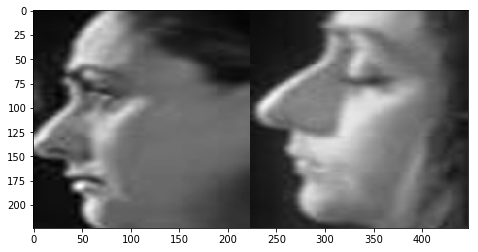

[0. 0. 1. 0. 0. 0. 0. 0.] [0. 0. 1. 0. 0. 0. 0. 0.]
disgust
disgust


In [136]:
# show image
anger= np.array([1,0,0,0,0,0,0,0])
contempt= np.array([0,1,0,0,0,0,0,0])    
disgust= np.array([0,0,1,0,0,0,0,0])   
fear= np.array([0,0,0,1,0,0,0,0])    
happiness= np.array([0,0,0,0,1,0,0,0])    
neutral= np.array([0,0,0,0,0,1,0,0])      
sadness= np.array([0,0,0,0,0,0,1,0])     
surprise= np.array([0,0,0,0,0,0,0,1]) 

def show_face(dataset,idx):
    img = dataset[idx]
    plt.imshow(img,cmap='gray')
    plt.show()

def show_face_compared(dataset1,idx1,dataset2,idx2):
    img1=dataset1[idx1]
    img2=dataset2[idx2]
    pair = np.concatenate((img1, img2), axis=1)
    plt.figure(figsize=(8,4))
    plt.imshow(pair,cmap='gray')
    plt.show()

def show_label(label_test):
    if (label_test==anger).all():
        print('anger')
    elif (label_test==contempt).all():
        print('contempt')
    elif (label_test==disgust).all():
        print('disgust')
    elif (label_test==fear).all():
        print('fear')
    elif (label_test==happiness).all():
        print('happiness')
    elif (label_test==neutral).all():
        print('neutral')
    elif (label_test==sadness).all():
        print('sadness')
    elif (label_test==surprise).all():
        print('surprise')
    else:
        print('error')
    
### an example of figure show and label show    
for idx in range(0,1):
    show_face_compared(data,idx,train,idx)
    print(labels[idx],train_labels[idx])
    show_label(labels[idx])
    show_label(train_labels[idx])

In [156]:
# use VGG-16 to train model
optimizer = RMSprop(lr=1e-4)
objective = 'categorical_crossentropy'

def model_vgg16():
    model = Sequential()

    model.add(Conv2D(64, (3, 3), padding='same', input_shape=(ROWS, COLS,1), activation='relu'))
    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))

    model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
#     model.add(Convolution2D(256, 3, 3, border_mode='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))
    
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))

    model.add(Dense(8))
    model.add(Activation('sigmoid'))

    model.compile(loss=objective, optimizer=optimizer, metrics=['accuracy'])
    return model

def model_me():
    model = Sequential()

    model.add(Conv2D(32, (3, 3), padding='same', input_shape=(ROWS, COLS,1), activation='relu'))
    model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))

    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
#    model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
#     model.add(Convolution2D(256, 3, 3, border_mode='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))
    
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))

    model.add(Dense(8))
    model.add(Activation('sigmoid'))

    model.compile(loss=objective, optimizer=optimizer, metrics=['accuracy'])
    return model

def model_simple():
    model = Sequential()

    model.add(Conv2D(16, (3, 3), padding='same', input_shape=(ROWS, COLS,1), activation='relu'))
    model.add(Conv2D(16, (3, 3), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))

    model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
#    model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
#     model.add(Convolution2D(256, 3, 3, border_mode='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.5))
    
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.5))

    model.add(Dense(8))
    model.add(Activation('sigmoid'))

    model.compile(loss=objective, optimizer=optimizer, metrics=['accuracy'])
    return model

model = model_simple()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_38 (Conv2D)           (None, 224, 224, 16)      160       
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 224, 224, 16)      2320      
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 112, 112, 32)      4640      
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 112, 112, 32)      9248      
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 56, 56, 64)        18496     
__________

In [166]:
nb_epoch = 40
batch_size = 20

## Callback for loss logging per epoch
class LossHistory(Callback):
    def on_train_begin(self, logs={}):
        self.losses = []
        self.val_losses = []
        
    def on_epoch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss'))

early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, mode='auto')        
        
def run_facial():
    
    history = LossHistory()
    model.fit(train_data, train_labels, batch_size=batch_size, epochs=nb_epoch,
              validation_split=0.25, verbose=0, shuffle=True, callbacks=[history, early_stopping])
              #validation_split=0.25, verbose=0, shuffle=True, callbacks=[history])
    

    #predictions = model.predict(test, verbose=0)
    return history
history = run_facial()
#model.save('my_model_32_512.h5')

D:\Anaconda\envs\test_env_3.7\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.485173). Check your callbacks.
  % delta_t_median)


Epoch 00007: early stopping


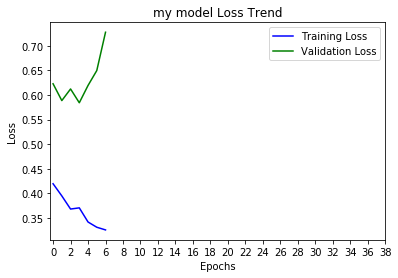

In [167]:
loss = history.losses
val_loss = history.val_losses

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('my model Loss Trend')
plt.plot(loss, 'blue', label='Training Loss')
plt.plot(val_loss, 'green', label='Validation Loss')
plt.xticks(range(0,nb_epoch)[0::2])
plt.legend()
plt.show()

In [168]:
val_predictions = model.predict(val_data, verbose=0)
train_predictions=model.predict(train_data,verbose=0)
#test_predictions=model.predict(test,verbose=0)

In [169]:
## all detail in this model
acc_all,n_wrc,n_ric,n_allc,n_alll=detail(labels,all_predictions)
print('wrong prediction of each label',n_wrc)
print('right prediction of each label',n_ric)
print('prediction of each label      ',n_allc)
print('true of each label            ',n_alll)

wrong prediction of each label [  28    0   84    0  510 1478    1   82]
right prediction of each label [  10    0   61    0 4520 6134    1   84]
prediction of each label       [  38    0  145    0 5030 7612    2  166]
true of each label             [ 239    8  197   19 5408 6520  253  349]


In [148]:
# test performance on test set(seperate of training part)
# a full understanding of model accuracy and classfication

def notsure(predictions):
    n_notsure=0
    for i in range (0,len(predictions)):
        if (predictions[i]<0.7 and predictions[i]>0.3):
            n_notsure+=1
    notsure_per=n_notsure/len(predictions)
    return notsure_per

def get_hot_value(prediction_list):
    hot_list=np.zeros((prediction_list.shape[0],prediction_list.shape[1]),int)
    for i in range (0,len(prediction_list)):
        max_val, hot_oneline, max_found = max(prediction_list[i]), [], False
        for item in prediction_list[i]:
            if item == max_val and not max_found:
                hot_oneline.append(1)
                max_found = True
            else:
                hot_oneline.append(0)
        hot_list[i,:]=hot_oneline
    return hot_list

def detail(label,predictions):
    n_right=0
    n_wrong=0
    pred_onehot=get_hot_value(predictions)
    n_wrongclassified=np.zeros((predictions.shape[1]),int) #classified as a label(in predictions), but is not
    n_rightclassified=np.zeros((predictions.shape[1]),int)
    n_allclassified=pred_onehot.sum(axis=0)
    n_alllabeled=label.sum(axis=0)
    for i in range (0,len(predictions)):
        if (label[i]==pred_onehot[i]).all():
            n_right+=1
            n_rightclassified+=pred_onehot[i]
        else:
            n_wrong+=1
            n_wrongclassified+=pred_onehot[i]
    accuracy=n_right/len(predictions)
    return accuracy,n_wrongclassified,n_rightclassified,n_allclassified,n_alllabeled.astype(int)
        

In [170]:
## validation detail in this model
accu=accuracy(val_labels,val_predictions)
val_onehot=get_hot_value(val_predictions)
print('the test total accuracy is %f'%(accu))

the test total accuracy is 0.835000


In [ ]:
print(val_onehot.sum(axis=0))
print( val_labels.sum(axis=0))

In [165]:
model.save('face_model3_16_512.h5')

In [123]:
labels.shape

(12993, 8)